In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
emails_df = pd.read_csv('/content/emails.csv')
emails_df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,Email 2598,0,1,1,0,1,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2598,Email 2599,2,1,3,0,4,1,35,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2599,Email 2600,4,3,14,0,8,2,41,2,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2600,Email 2601,3,8,5,1,1,0,52,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [ ]:
emails_df_cleaned = emails_df.drop(columns=['Email No.'])
emails_df_cleaned

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,0,1,1,0,1,0,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2598,2,1,3,0,4,1,35,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2599,4,3,14,0,8,2,41,2,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2600,3,8,5,1,1,0,52,0,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [ ]:
emails_df_cleaned.dropna(inplace=True)

In [ ]:
emails_df_cleaned.isnull().sum()

,0
the,0
to,0
ect,0
and,0
for,0
...,...
military,0
allowing,0
ff,0
dry,0


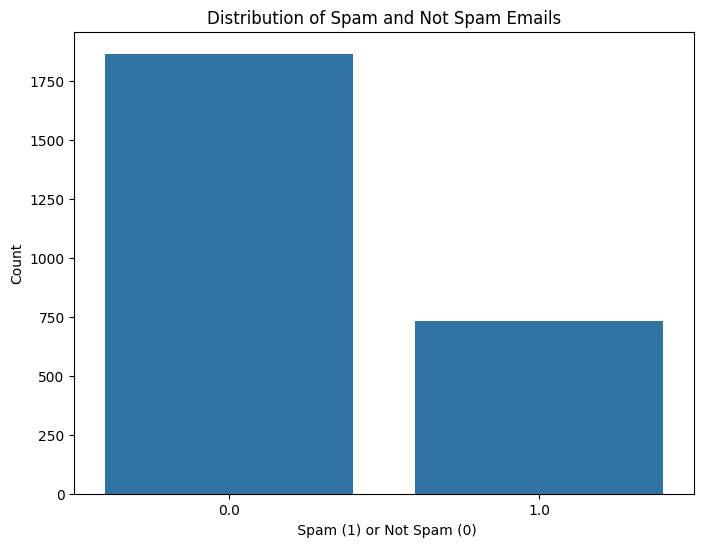

In [ ]:
plt.figure (figsize=(8, 6))
sns.countplot(x= 'Prediction', data=emails_df_cleaned)
plt.title('Distribution of Spam and Not Spam Emails')
plt.xlabel(' Spam (1) or Not Spam (0)' )
plt. ylabel ('Count' )
plt. show( )

In [ ]:
X = emails_df_cleaned.drop(columns=['Prediction'])
y = emails_df_cleaned['Prediction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
y_pred_nb

array([0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

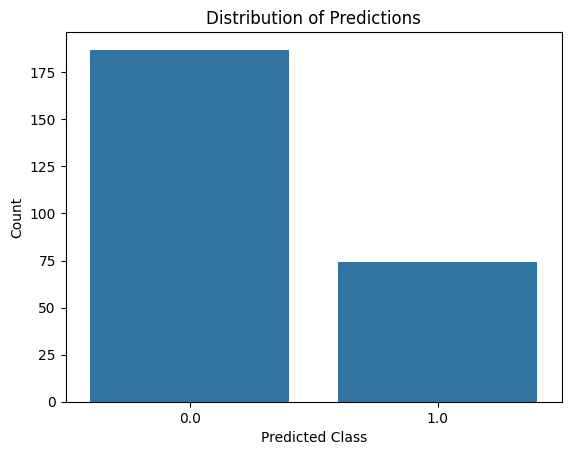

In [ ]:
sns.countplot(x=y_pred_nb)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel ('Count')
plt .show( )

In [ ]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classifier:")
print ("Accuracy:", nb_accuracy)
print ("Classification Report: \n", nb_classification_report)

Naive Bayes Classifier:
Accuracy: 0.9808429118773946
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       190
         1.0       0.95      0.99      0.97        71

    accuracy                           0.98       261
   macro avg       0.97      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261



In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
y_pred_svm

array([0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

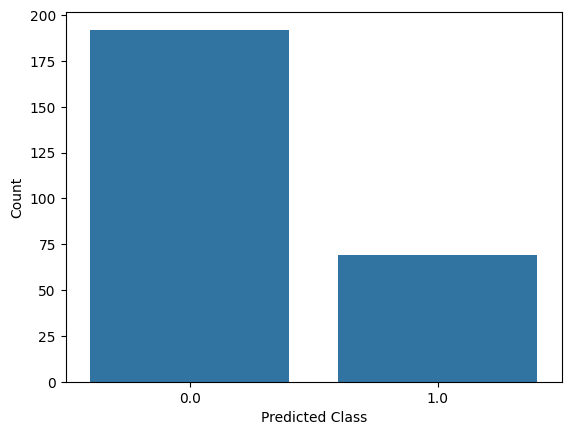

In [ ]:
sns.countplot(x=y_pred_svm)
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

In [38]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)

print("\nSupport Vector Machine Classifier:")
print("Accuracy:", svm_accuracy)
print("Classification Report:\n", svm_classification_report)


Support Vector Machine Classifier:
Accuracy: 0.946360153256705
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       190
         1.0       0.91      0.89      0.90        71

    accuracy                           0.95       261
   macro avg       0.94      0.93      0.93       261
weighted avg       0.95      0.95      0.95       261



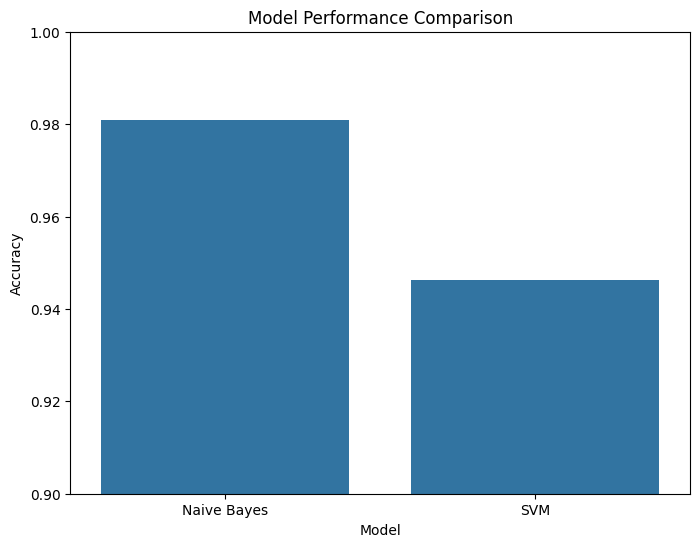

In [50]:
model_performance = pd.DataFrame({
'Model':["Naive Bayes", "SVM"],
'Accuracy':[nb_accuracy, svm_accuracy]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim (0.9, 1.0)
plt.show()